# SNPs: Sensitivity analysis

In [19]:
from SALib.sample import saltelli, fast_sampler
from SALib.sample import ff as ffs
from SALib.analyze import sobol, fast, ff
from SALib.plotting.bar import plot as barplot
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [20]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'genetic-variance', 'vertical-trans-variance'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.50]]
}

# EFast

In [16]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans-variance']
    t.to_csv(model_path + "data/param-snp-vt-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-efast.csv")
t.shape

(6000, 3)

In [22]:
df.columns

Index(['iteration', 'replicate', 'time', 'last_generation', 'population',
       'bmi_category_prop', 'am_bmi', 'am_pgs', 'genetic_variance',
       'vertical_tran_variance', 'average_bmi', 'sd_bmi'],
      dtype='object')

In [23]:
# process results
df = pd.read_csv(output_path + "results-snp-vt-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]
Y = df["g4"].to_numpy()
len(Y)


C:\Users\Y75149~1\AppData\Local\Temp/ipykernel_7044/1986313884.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


6000

In [31]:
df.columns

Index(['iteration', 'replicate', 'time', 'last_generation', 'population',
       'bmi_category_prop', 'am_bmi', 'am_pgs', 'genetic_variance_x',
       'vertical_tran_variance', 'average_bmi', 'sd_bmi', 'g1', 'g2', 'g3',
       'g4', 'init_pop', 'fertility_type', 'genetic_variance_y',
       'vertical_trans_variance', 'random_mating', 'fertility_factor'],
      dtype='object')

In [24]:
Sif = fast.analyze(problem, Y, print_to_console=True)

                               S1        ST   S1_conf   ST_conf
random-mating            0.232875  0.495882  0.003907  0.020338
genetic-variance         0.205643  0.451674  0.003679  0.018995
vertical-trans-variance  0.255707  0.507927  0.003524  0.019963


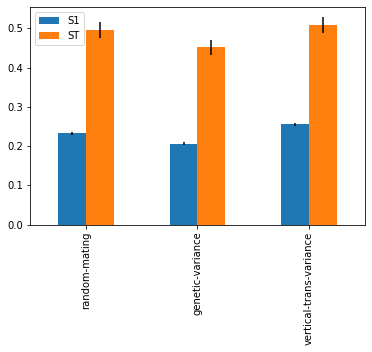

In [25]:
Sif.plot()
plt.savefig(plots_path + "snp-vt-efast.pdf", bbox_inches='tight')

In [26]:
shutil.copy(plots_path + "snp-vt-efast.pdf", "../manuscript/plots/")

'../manuscript/plots/snp-vt-efast.pdf'

In [30]:
fig = px.scatter_3d(df, x='p_random_mating', y='p_vertical_trans_variance', z= "p_genetic_variance',
              color='g4', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.7),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='cultural variance',
                    zaxis_title='genetic variance'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="Obese")
                    )
fig.show()

In [20]:
fig.write_image(plots_path + "3D-scatter-snps-efast.pdf")
shutil.copy(plots_path + "3D-scatter-snps-efast.pdf", "../manuscript/plots/")

# Sobol

In [6]:
sample_parameters = True
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-sobol.csv")
len(t)

16384

In [ ]:
# process results
df = pd.read_csv(output_path, "results-snp-sobol.csv", sep = ";")
cols = df.bmi_group_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]
Y = df["g4"].to_numpy()
len(Y)

In [ ]:
Si = sobol.analyze(problem, Y, print_to_console=True)

In [ ]:
total, first, second = Si.to_df()

In [ ]:
st = barplot(total)
plt.savefig(plots_path + "snp-sobol-st.pdf", bbox_inches='tight')
s1 = barplot(first)
plt.savefig(plots_path + "snp-sobol-s1.pdf", bbox_inches='tight')
s2 = barplot(second)
plt.savefig(plots_path + "snp-sobol-s2.pdf", bbox_inches='tight')

shutil.copy(plots_path + "snp-sobol-st.pdf", "../manuscript/plots/")
shutil.copy(plots_path + "snp-sobol-s1.pdf", "../manuscript/plots/")
shutil.copy(plots_path + "snp-sobol-s2.pdf", "../manuscript/plots/")

In [ ]:
fig = px.scatter_3d(df, x='random_mating', y='fertility_factor', z='leakage',
              color='g4', color_continuous_scale = px.colors.sequential.OrRd)

fig.update_traces(marker=dict(size=4, opacity = 0.4),
                  selector=dict(mode='markers'))
fig.update_layout(scene = dict(
                    xaxis_title='random mating',
                    yaxis_title='fertility differential',
                    zaxis_title='leakage'),
                    width=700,
                    margin=dict(r=10, b=10, l=10, t=10), 
                    coloraxis_colorbar=dict(title="Obese")
                    )
fig.show()

In [ ]:
fig.write_image(plots_output + "3D-scatter-sobol.pdf")
shutil.copy(plots_output + "3D-scatter-sobol.pdf", "../manuscript/plots/")